<a href="https://colab.research.google.com/github/HoangQuanHCMUTEK19/CNN/blob/main/NguyenLeHoangQuan-19146378-BaiKiemTra-Nhandienbieucam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout,Flatten,Conv2D,MaxPooling2D
from keras.datasets import mnist, fashion_mnist, cifar10, cifar100
from tensorflow.keras.optimizers import Adam, RMSprop,SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.utils import np_utils
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.compat.v2 as tf
from tensorflow import keras
import os
import pickle
import pandas as pd
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

In [4]:
#Link Train va test
train_path = "/content/drive/MyDrive/Bieucam"

In [3]:
#Kết nối với google drive 
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
path_img = []
labels = ['Giangiu','Hanh Phuc','Ngacnhien','SoHai']
x_train = []
y_train = []
# Tao dataset
for i in labels:
  path = os.path.join(train_path,i)
  index_label = labels.index(i)
  for j in os.listdir(path):
      img_path = os.path.join(path, j)
      img = image.load_img(img_path, target_size=(150,150)) 
      img = img_to_array(img)
      img = img.reshape(150,150,3) 
      img = img.astype('float32')
      img = img/255
      x_train.append(img)
      y_train.append(index_label)

#xử lí dữ liệu 
x_train = np.array(x_train) #Chuẩn từ dữ liệu list sang mảng 
y_train = np.array(y_train)
y_train = np_utils.to_categorical(y_train) #đưa về 0 và 1 

In [9]:
#Thiết lập model 
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 87616)             0         
                                                                 
 dense_2 (Dense)             (None, 256)              

In [10]:
#Complie Model 
opt=SGD(learning_rate=0.01,momentum=0.9)
model.compile(loss='binary_crossentropy',optimizer=opt, metrics=['accuracy'])

In [11]:
#Training Model 
history = model.fit(x_train,y_train,epochs = 20)

Epoch 1/20
2/2 [==============================] - 3s 1s/step - loss: 2.3641 - accuracy: 0.1525
Epoch 2/20
2/2 [==============================] - 2s 1s/step - loss: 2.2337 - accuracy: 0.2373
Epoch 3/20
2/2 [==============================] - 2s 1s/step - loss: 0.8680 - accuracy: 0.2542
Epoch 4/20
2/2 [==============================] - 2s 1s/step - loss: 0.6489 - accuracy: 0.2373
Epoch 5/20
2/2 [==============================] - 3s 1s/step - loss: 0.6434 - accuracy: 0.4068
Epoch 6/20
2/2 [==============================] - 2s 1s/step - loss: 0.6062 - accuracy: 0.4407
Epoch 7/20
2/2 [==============================] - 2s 1s/step - loss: 0.5581 - accuracy: 0.3051
Epoch 8/20
2/2 [==============================] - 2s 1s/step - loss: 0.5556 - accuracy: 0.3051
Epoch 9/20
2/2 [==============================] - 2s 1s/step - loss: 0.5520 - accuracy: 0.3559
Epoch 10/20
2/2 [==============================] - 2s 1s/step - loss: 0.5101 - accuracy: 0.7458
Epoch 11/20
2/2 [==============================] 

Day la Giangiu


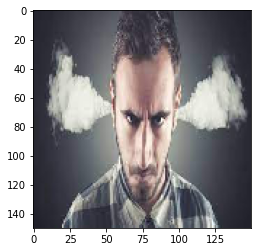

In [12]:
#Load ảnh 
img = image.load_img('download1.jpg', target_size=(150,150)) 
plt.imshow(img)
#Chuyển ảnh về mảng 
img = img_to_array(img)
img = img.reshape(1,150,150,3) #thay đổi hình dạng mảng 
img = img.astype('float32') #thay đổi kiểu dữ liệuliệu
img = img/255 #chuẩn hóa dữ liệu thành 0 và  1 
print('Day la '+ labels[np.argmax(model.predict(img))]) #dự đoán 

Day la Ngacnhien


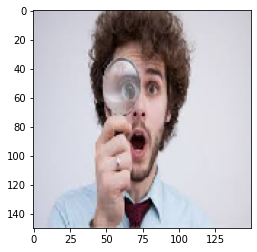

In [13]:
#Load ảnh 
img1 = image.load_img('ngacnhien2.jpg', target_size=(150,150)) 
plt.imshow(img1)
#Chuyển ảnh về mảng 
img1 = img_to_array(img1)
img1 = img1.reshape(1,150,150,3) #thay đổi hình dạng mảng 
img1 = img1.astype('float32') #thay đổi kiểu dữ liệuliệu
img1 = img1/255 #chuẩn hóa dữ liệu thành 0 và  1 
print('Day la '+ labels[np.argmax(model.predict(img1))]) #dự đoán 

Day la Hanh Phuc


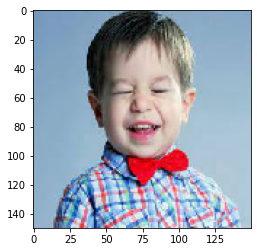

In [15]:
#Load ảnh 
img2  = image.load_img('download2.jpg', target_size=(150,150)) 
plt.imshow(img2)
#Chuyển ảnh về mảng 
img2 = img_to_array(img2)
img2 = img2.reshape(1,150,150,3) #thay đổi hình dạng mảng 
img2 = img2.astype('float32') #thay đổi kiểu dữ liệuliệu
img2 = img2/255 #chuẩn hóa dữ liệu thành 0 và  1 
print('Day la '+ labels[np.argmax(model.predict(img2))]) #dự đoán 